

# **Modeling non-linear relationship using Polynomial Regression Model**








## **Resources**

- Polynomial regression 
https://en.wikipedia.org/wiki/Polynomial_regression
- Polynomial Regression with Scikit learn: What You Should Know
https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
- Master Polynomial Regression With Easy-to-Follow Tutorials
https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/#:~:text=Polynomial%20regression%20is%20a%20form,convert%20it%20into%20Polynomial%20regression.
- Polynomial Regression
https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
- ML Polynomial Regression
https://www.javatpoint.com/machine-learning-polynomial-regression
- 3 Techniques for Building a Machine Learning Regression Model from a Multivariate Nonlinear Dataset
https://towardsdatascience.com/3-techniques-for-building-a-machine-learning-regression-model-from-a-multivariate-nonlinear-dataset-88b25fc24ad5

## **Reading the Data**

### Importing Needed packages


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.svm import SVR 
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

### Reading the Data


In [2]:
current_directory = os.getcwd() 
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
print("Parent directory:", parent_directory)
# Data_directory = parent_directory + "/Data" + "/FuelConsumptionCo2.csv"
Data_directory = parent_directory + "/Data" + "/dataset_reduce_PI_MG.csv"
print(Data_directory)

Parent directory: d:\Github\Resources
d:\Github\Resources/Data/dataset_reduce_PI_MG.csv


In [3]:
df = pd.read_csv(Data_directory)
# cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf = df[['tau','theta','MVI','Deli', 'AcorAr','MG']]
cdf.head(9)

,tau,theta,MVI,Deli,AcorAr,MG
0,455,181,0.999982,0.999978,4329.209163,34.101803
1,155,181,0.999983,0.999979,14369.155960,68.099895
2,505,41,0.999849,0.999848,188.722445,26.957749
3,155,181,0.999989,0.999984,14285.013080,68.099895
4,405,1,0.993893,0.993642,1.584990,39.497033
5,155,81,0.999956,0.999955,2639.801359,39.668763
6,655,81,0.999938,0.999937,604.255478,26.515426
7,255,1,0.993800,0.993558,0.723344,37.972201
8,205,181,0.999982,0.999979,11070.028630,57.033900


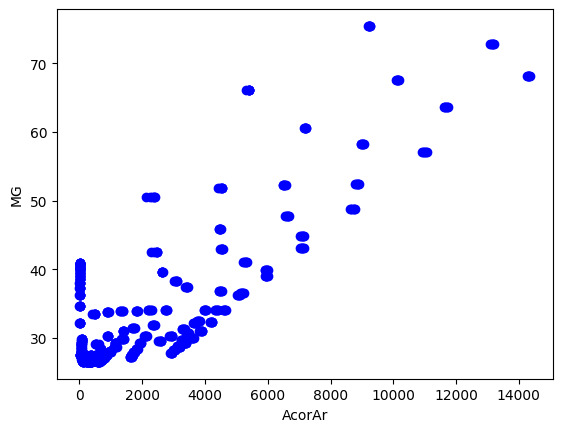

In [4]:
# plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")
# plt.show()

plt.scatter(cdf.AcorAr, cdf.MG,  color='blue')
plt.xlabel("AcorAr")
plt.ylabel("MG")
plt.show()

#### Creating train and test dataset



In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# col= ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
# X_train = np.asanyarray(train[col])
# y_train = np.asanyarray(train[['CO2EMISSIONS']])
# X_test= np.asanyarray(test[col])
# y_test = np.asanyarray(test[['CO2EMISSIONS']])
# X=np.concatenate([X_test, X_train], axis=0) 
# y=np.concatenate([y_test, y_train], axis=0)

col= ['tau','theta','MVI','Deli', 'AcorAr']    
X_train = np.asanyarray(train[col])
y_train = np.asanyarray(train[['MG']])
X_test= np.asanyarray(test[col])
y_test = np.asanyarray(test[['MG']])
X=np.concatenate([X_test, X_train], axis=0)
y=np.concatenate([y_test, y_train], axis=0)

## **POLY Regression**


In [24]:
poly_features = PolynomialFeatures(degree=2)


In [25]:
X_train

array([[4.55000000e+02, 1.81000000e+02, 9.99981668e-01, 9.99977956e-01,
        4.32920916e+03],
       [1.55000000e+02, 1.81000000e+02, 9.99982636e-01, 9.99978989e-01,
        1.43691560e+04],
       [5.05000000e+02, 4.10000000e+01, 9.99848834e-01, 9.99848355e-01,
        1.88722445e+02],
       ...,
       [5.55000000e+02, 1.81000000e+02, 9.99974240e-01, 9.99973617e-01,
        3.33533260e+03],
       [4.55000000e+02, 4.10000000e+01, 9.99849014e-01, 9.99846489e-01,
        2.14795397e+02],
       [4.55000000e+02, 4.10000000e+01, 9.99844020e-01, 9.99843998e-01,
        1.83063300e+02]])

In [26]:
np.shape(X_train)

(618, 5)

In [27]:
x_train_poly = poly_features.fit_transform(X_train)
x_train_poly 

array([[1.00000000e+00, 4.55000000e+02, 1.81000000e+02, ...,
        9.99955912e-01, 4.32911373e+03, 1.87420520e+07],
       [1.00000000e+00, 1.55000000e+02, 1.81000000e+02, ...,
        9.99957978e-01, 1.43688540e+04, 2.06472643e+08],
       [1.00000000e+00, 5.05000000e+02, 4.10000000e+01, ...,
        9.99696733e-01, 1.88693827e+02, 3.56161614e+04],
       ...,
       [1.00000000e+00, 5.55000000e+02, 1.81000000e+02, ...,
        9.99947235e-01, 3.33524461e+03, 1.11244436e+07],
       [1.00000000e+00, 4.55000000e+02, 4.10000000e+01, ...,
        9.99693002e-01, 2.14762423e+02, 4.61370625e+04],
       [1.00000000e+00, 4.55000000e+02, 4.10000000e+01, ...,
        9.99688020e-01, 1.83034742e+02, 3.35121720e+04]])

In [23]:
np.shape(x_train_poly)

(618, 56)

In [16]:
X_train[0]

array([4.55000000e+02, 1.81000000e+02, 9.99981668e-01, 9.99977956e-01,
       4.32920916e+03])

In [18]:
4.55000000e+02*1.81000000e+02

82355.0

In [17]:
x_train_poly[0]

array([1.00000000e+00, 4.55000000e+02, 1.81000000e+02, 9.99981668e-01,
       9.99977956e-01, 4.32920916e+03, 2.07025000e+05, 8.23550000e+04,
       4.54991659e+02, 4.54989970e+02, 1.96979017e+06, 3.27610000e+04,
       1.80996682e+02, 1.80996010e+02, 7.83586859e+05, 9.99963336e-01,
       9.99959624e-01, 4.32912980e+03, 9.99955912e-01, 4.32911373e+03,
       1.87420520e+07])

In [30]:
# Aplicar regresión polinómica de grado 2 en los datos de entrenamiento
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predicción en el conjunto de validación
x_val_poly = poly_features.transform(X_test)
y_pred_val = model.predict(x_val_poly)

# Calcular el coeficiente de determinación R² en el conjunto de validación
y_val=y_test
r2 = r2_score(y_val, y_pred_val)
print("Coeficiente de determinación R² en validación:", r2)

y_hat =y_pred_val
x1 = np.asanyarray(X_test)
y1 = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y1) ** 2))


print("R2-score: %.2f" % r2_score(y_hat ,y1) )

Coeficiente de determinación R² en validación: 0.9844761005672698
Residual sum of squares: 1.69
R2-score: 0.98


In [31]:
len(model.coef_[0])

21

In [35]:
for i in range(10,20):
    print("---------------------------"+ "GRADO-" + str(i)+ '-------------------------------------------')
    # Aplicar regresión polinómica de grado 2 en los datos de entrenamiento
    poly_features = PolynomialFeatures(degree=i)
    x_train_poly = poly_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Predicción en el conjunto de validación
    x_val_poly = poly_features.transform(X_test)
    y_pred_val = model.predict(x_val_poly)

    # Calcular el coeficiente de determinación R² en el conjunto de validación
    y_val=y_test
    r2 = r2_score(y_val, y_pred_val)
    print("Coeficiente de determinación R² en validación:", r2)

---------------------------GRADO-10-------------------------------------------
Coeficiente de determinación R² en validación: 0.6910708974217445
---------------------------GRADO-11-------------------------------------------
Coeficiente de determinación R² en validación: 0.6299751484772944
---------------------------GRADO-12-------------------------------------------
Coeficiente de determinación R² en validación: 0.5359483158059433
---------------------------GRADO-13-------------------------------------------
Coeficiente de determinación R² en validación: 0.44626978269983175
---------------------------GRADO-14-------------------------------------------
Coeficiente de determinación R² en validación: 0.4114233398589112
---------------------------GRADO-15-------------------------------------------
Coeficiente de determinación R² en validación: 0.42470441106262236
---------------------------GRADO-16-------------------------------------------
Coeficiente de determinación R² en validación: 0.

In [72]:
# Pipeline helps you associate two models or objects to be built sequentially with each other,  # https://towardsdatascience.com/building-generator-pipelines-in-python-8931535792ff
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error
mse = []
coeff = []
icpt = []
r2_score = []


pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                     ('model', LinearRegression())])
pipeline.fit(X, y)
y_pred = pipeline.predict(X)
    
r2_score.append(metrics.r2_score(y, y_pred))
mse.append(mean_squared_error(y, y_pred, squared=False))  
coeff.append(pipeline.steps[1][1].coef_) 
icpt.append(pipeline.steps[1][1].intercept_) 

In [73]:
# respective coefficients/intercepts for different degrees
pd.set_option('display.max_colwidth', None)

param = pd.DataFrame(list(zip(degrees, coeff, icpt)), columns = ['degrees', 'Coefficients', 'Intercepts'])
param

,degrees,Coefficients,Intercepts
0,1,"[[0.0, 0.24840279614712069, -1270.1924315015751, 3670980.7649022373, -3675598.669539652, 33.6905356365079, -7.782327486237633e-06, 0.00016362297467889615, 49.092408908362, -49.33515769595862, -1.3044975217054774e-05, 0.0005408748791316111, -1194.9195092466264, 2464.904471337228, 3.16103757869734e-06, -1795347.866005038, -109202.40673641446, 34.905105968761596, 1906508.7706174501, -68.58850513611092, -2.1853641540836577e-07]]",[2696.7930695844057]


In [74]:
r2_score

[0.9890131731004127]